In [1]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# Tasks
* Train a classifier with fully-connected layers only.
* Train a classifier with convolutions only.
* Train a classifier with convolutions and fully-connected layers.
* Train a denoising network. Note, you have to create some noisy observations first ;)

In [3]:
# Use your own path ;)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0


In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


## train images

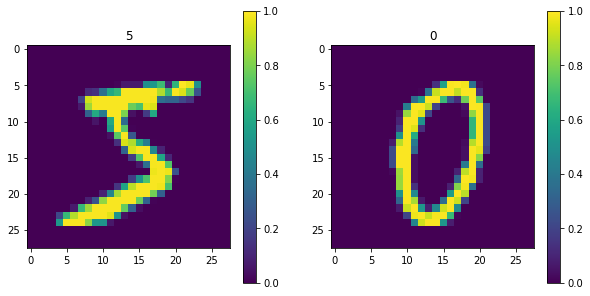

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.colorbar()
plt.title(y_train[0].item());
plt.subplot(1,2,2)
plt.imshow(x_train[1000])
plt.colorbar()
plt.title(y_train[1000].item());

## test images

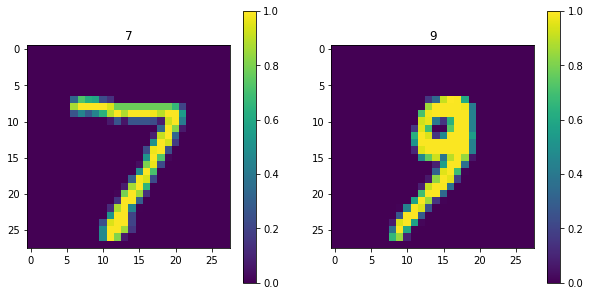

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.colorbar()
plt.title(y_test[0].item());
plt.subplot(1,2,2)
plt.imshow(x_test[1000])
plt.colorbar()
plt.title(y_test[1000].item());

## categorize labels

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

## flatten images

In [9]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# 1. Create model

## fully-connected network

### the simple way

dense

In [2]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
input_layer = tf.keras.layers.Input()
dense1 = tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,))(input_layer)

convolutions only

In [ ]:
conv_network = tf.keras.models.Sequential()
conv_network.add(tf.keras.layers.Conv2D(32, (1,1), activation='relu', input_shape=(28, 28)))
conv_network.add(tf.keras.layers.Conv2D(32, (1,1), activation='softmax'))

___
### the hard way

dense

In [68]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(512)
        self.dense2 = tf.keras.layers.Dense(10)
        
    def call(self, x):
        x = tf.nn.relu(self.dense1(x))
        x = tf.nn.softmax(self.dense2(x))
        return x

convolution only

In [ ]:
class MyConvModel(tf.keras.Model):
    def __init__(sefl):
        super(MyConvModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32)
        self.conv2 = tf.keras.layers.Conv2D(1)
    
    def call(self, x):
        x = tf.nn.relu(self.conv1(x))
        x = tf.nn.softmax(self.conv2(x))
        return x

# 2. Test if model runs

the simple way

In [50]:
network.fit(x_train, y_train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1014 - accuracy: 0.9725
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0938 - accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0870 - accuracy: 0.9769
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0809 - accuracy: 0.9783
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0751 - accuracy: 0.9805
Epoch 6/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0701 - accuracy: 0.9814
Epoch 7/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0653 - accuracy: 0.9828
Epoch 8/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0612 - accuracy: 0.9840
Epoch 9/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0573 - accuracy: 0.9853
Epoch 10/10
60

___
the hard way

In [103]:
model = MyModel()

In [104]:
model.build(input_shape=(784, 1))

In [105]:
model.summary()

Model: "my_model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  1024      
_________________________________________________________________
dense_12 (Dense)             multiple                  513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [79]:
one_in = x_train[0].copy()
one_in = tf.expand_dims(one_in, axis=-1)
print(one_in.shape)

untrained = model.call(one_in)
untrained

(784, 1)


<tf.Tensor: shape=(784, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
 

# 3. Choose loss-function and optimizer

In [111]:
loss = tf.keras.losses.CategoricalCrossentropy()
# loss = tf.keras.losses.MSE

In [107]:
optimizer = tf.optimizers.Adam(learning_rate=1e-4)

___

In [ ]:
network.compile(loss=loss_function, optimizer=optimizer_function, metrics=['accuracy'])

___

In [112]:
model.compile(loss=loss, optimizer=optimizer)

# 4. Write train-loop

__Note:__ This time we did not set the environment variable to hide the GPU. Hence, if you have access to a GPU the model will automatically run on GPU.

__PS:__ Don't forget `@tf.function` to speed-up training!

In [138]:
def train(model, x, y, loss_function, optimizer_function, num_epochs):
    @tf.function
    def train_step(x_, y_):
        with tf.GradientTape() as tape:
            y_hat = model(x_, training=True)
            loss = loss_function(y_, y_hat)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer_function.apply_gradients(zip(grads, model.trainable_weights))
        return loss
    
    running_loss = 0.0
    for e in tqdm(range(num_epochs)):
        for x_, y_ in zip(x, y):
            x_ = tf.expand_dims(x_, -1) 
            y_ = tf.expand_dims(y_, -1)
            
            loss = train_step(x_, y_)
            
            running_loss += float(loss) # cast to float
            
        running_loss /= len(x)
        if e % 2 == 0:
            running_loss /= 100.
            print('Epoch: {:4}; Train-Loss: {}'.format(e, np.round(running_loss, 3)))
            running_loss = 0.0

In [139]:
train(model, x_train, y_train, loss, optimizer, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:    0; Train-Loss: 232.713
Epoch:    2; Train-Loss: 232.717
Epoch:    4; Train-Loss: 232.717
Epoch:    6; Train-Loss: 232.717
Epoch:    8; Train-Loss: 232.717


# 5. Evaluate

In [55]:
test_loss, test_acc = network.evaluate(x=x_test, y=y_test_labels)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0781 - accuracy: 0.9771
0.07811627207584679
0.9771


In [56]:
pred = network.predict(x_test,verbose=1)

10000/10000 [==============================] - 0s 21us/sample


In [57]:
pred.shape

(10000, 10)

In [92]:
index = 0
max_value = max(pred[index])
label = np.where(pred[index] == max_value)
print(label[0])

[7]


___

In [143]:
x_test_small = x_test[0:100]
y_test_small = y_test[0:100]
y_test_labels_small = y_test_labels[0:100]

for i,j in zip(x_test_small, y_test_small):
    i = tf.expand_dims(i, -1)
    j = tf.expand_dims(j, -1)

In [145]:
test_loss, test_acc = model.evaluate(x_test_small, y_test_labels_small)

ValueError: ('Error when checking model input: expected no data, but got:', array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))